# .Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

# .Hypothesis Generation

### Store Level Hypotheses:


1. Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.
1. Population Density: Stores located in densely populated areas should have higher sales because of more demand.
1. Store Capacity: Stores which are very big in size should have higher sales.
1. City type: Like urban or rural or Tier1 or Tier2
1. Competitors: Stores having similar establishments nearby should have less sales because of more competition.
1. Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
1. Having Products: Stores keeping the right set of products to meet the local needs of customers will have higher sales.


### Product Level Hypotheses:

1. (The Most Important) Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
1. Product Brand: Branded products should have higher sales.
1. Promotional Offers: Products accompanied with attractive offers and discounts will sell more.
1. Packaging or Marketing: Products with good packaging can attract customers and sell more.
1. Utility: Daily use products should have a higher tendency to sell.
1. Visibility in Store: The location of product in a store will impact sales. 
1. Advertising: Better advertising of products in the store will should higher sales in most cases.


# .Loading Packages and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV,LassoCV
from xgboost import XGBRegressor
from sklearn import metrics
from scipy.stats import mode
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 


import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the data from csv file to Pandas DataFrame
test = pd.read_csv('Test.csv')
train = pd.read_csv('Train.csv')

# .Data Structure and Content

In [3]:
# first 5 rows of the dataframe
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
# first 5 rows of the dataframe
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# number of data points & number of features
print(" Test data Shape=",test.shape,"\n","Train data Shape=", train.shape)

 Test data Shape= (5681, 11) 
 Train data Shape= (8523, 12)


In [6]:
# getting some information about the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [7]:
# getting some information about the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# .Exploratory Data Analysis

#### Categorical Features:

1. Item_Identifier
1. Item_Fat_Content
1. Item_Type
1. Outlet_Identifier
1. Outlet_Size
1. Outlet_Location_Type
1. Outlet_Type

In [8]:
len(train['Item_Identifier'].unique())

1559

Number of unique products is 1559 so column Item_Identifier is products.

In [9]:
len(train["Outlet_Identifier"].unique())

10

Number of stores or we can say outlets or Outlet_Identifier is 10. As mentioned in the problem statement as well.

Train and Test contains 8523 and 5681 no of data respectively.
Test data is missing one column that is target variable ( Item_Outlet_Sales ), Which we will predict with our model.

# .Missing Value Treatment

In [10]:
# checking for missing values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
# checking for missing values
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
print(train.isnull().sum()/train.shape[0] *100,"/n/t")
print(test.isnull().sum()/test.shape[0] *100)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 /n/t
Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64


### Handling Missing Values:
Mean --> average

Mode --> more repeated value

In [13]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [15]:
# mean value of "Item_Weight" column
train['Item_Weight'].mean()

12.857645184136183

In [16]:
test['Item_Weight'].mean()

12.695633368756374

In [17]:
def filling_missing_values(df):
    df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [18]:
filling_missing_values(train)
filling_missing_values(test)

In [19]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [20]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We have succcessfully imputed the mean value in "Item_Weight" with missing values

In [21]:
# mode of "Outlet_Size" column
train['Outlet_Size'].mode()

0    Medium
dtype: object

In [22]:
# mode of "Outlet_Size" column
test['Outlet_Size'].mode()

0    Medium
dtype: object

In [23]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [24]:
test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [25]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
mode_of_Outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [26]:
miss_values = train['Outlet_Size'].isnull()
miss_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

- Creating function to reuse it.

In [27]:
def miss_outlet_size(df):
    mode_of_Outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))
    miss_bool = df['Outlet_Size'].isnull() 
    df.loc[miss_bool,'Outlet_Size'] = df.loc[miss_bool,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [28]:
miss_outlet_size(train)
miss_outlet_size(test)

In [29]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [30]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# .Univariate Analysis & .Bivariate Analysis

In [31]:
sns.set()

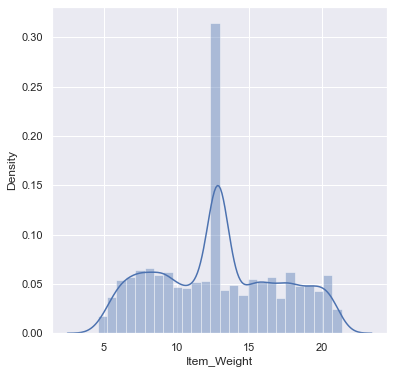

In [32]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(train['Item_Weight'])
plt.show()

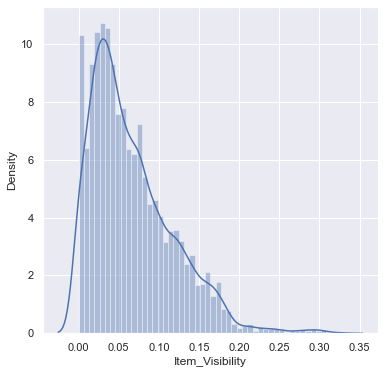

In [33]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(train['Item_Visibility'])
plt.show()

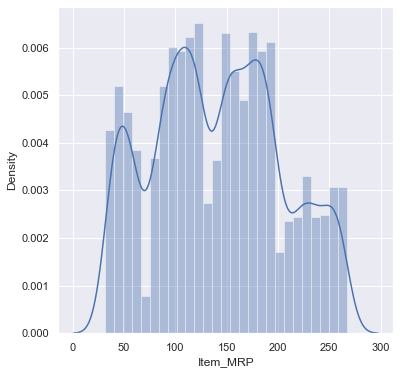

In [34]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(train['Item_MRP'])
plt.show()

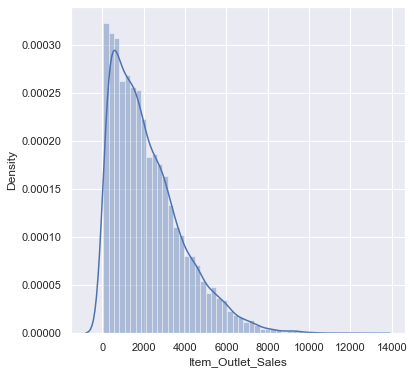

In [35]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(train['Item_Outlet_Sales'])
plt.show()

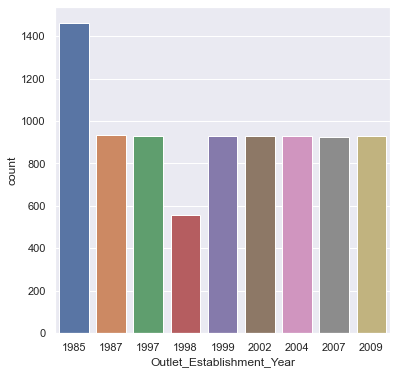

In [36]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=train)
plt.show()

### Categorical Features

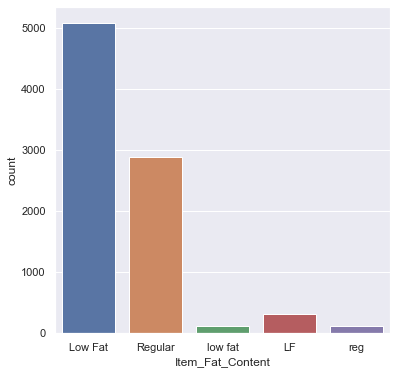

In [37]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=train)
plt.show()

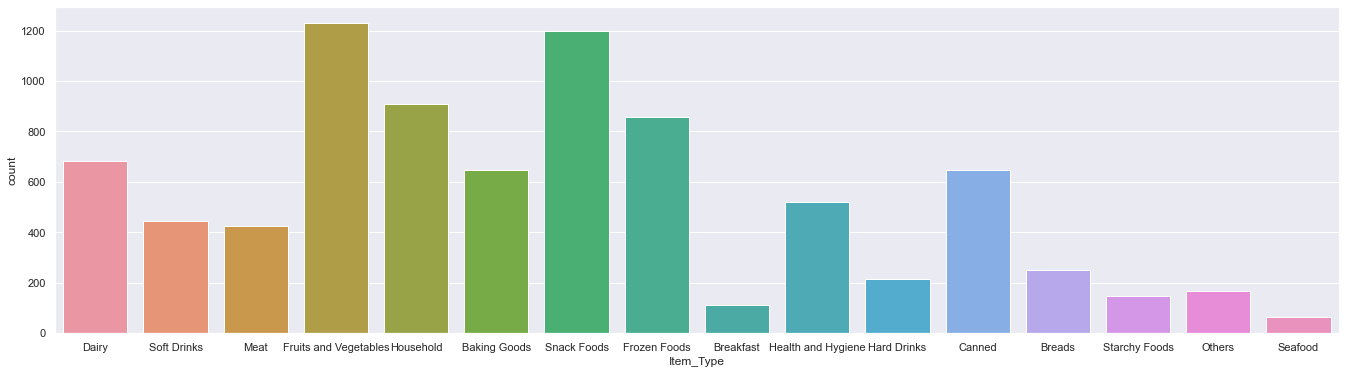

In [38]:
# Item_Type column
plt.figure(figsize=(23,6))
sns.countplot(x='Item_Type', data=train)
plt.show()

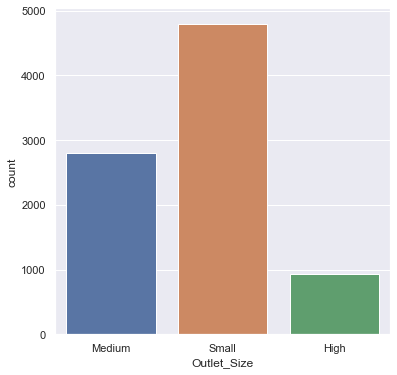

In [39]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=train)
plt.show()

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

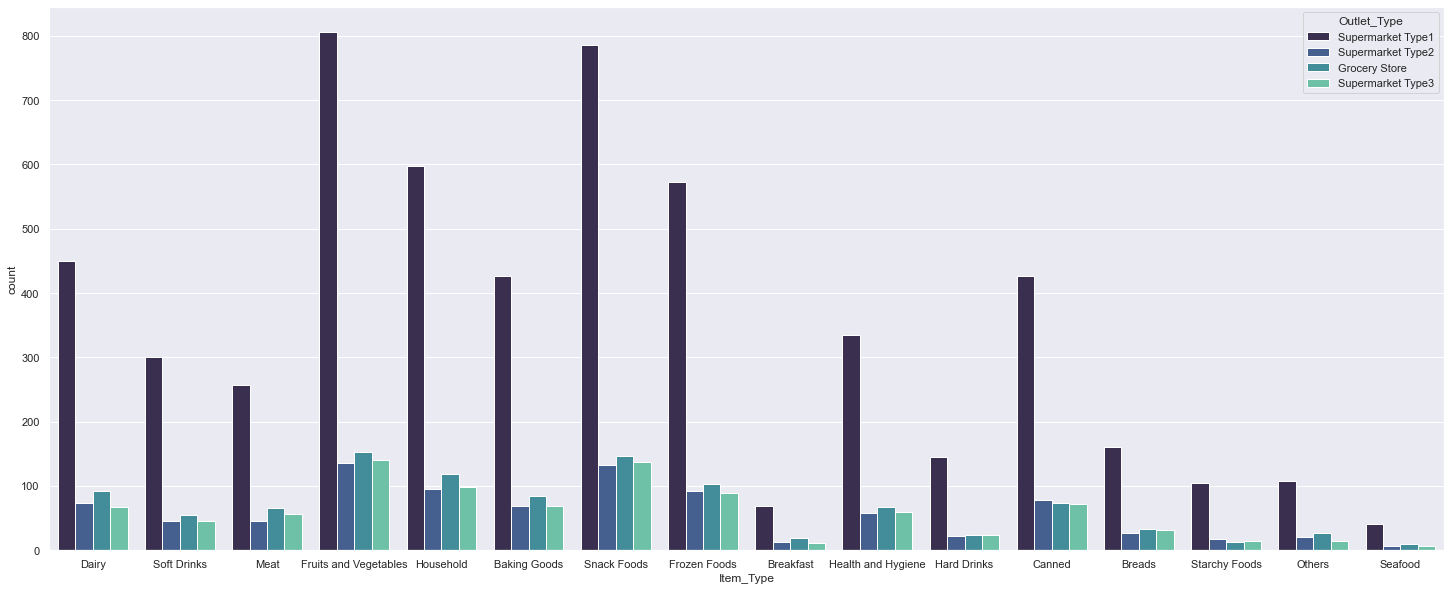

In [40]:
plt.figure(figsize=[25,10])
sns.countplot(x = "Item_Type", data=train, palette='mako', hue='Outlet_Type', orient='v')

In [41]:
# We have seen that "Item_Fat_Content" contains some dubplicate categories lets fix this first
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [42]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [43]:
def fixing_item_fat(df):
    df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [44]:
fixing_item_fat(train)
fixing_item_fat(test)

In [45]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [46]:
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

# .Feature Engineering

In [47]:
def cal_outlet_year(df):
    df['Outlet_Years'] = 2023 - df['Outlet_Establishment_Year']

In [48]:
cal_outlet_year(train)
cal_outlet_year(test)

In [49]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,24
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,25
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,36


In [50]:
train.drop(columns="Outlet_Establishment_Year", inplace=True)
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,14
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,24
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,25
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,36
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,36
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Small,Tier 2,Supermarket Type1,549.2850,21
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,19
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,14


In [51]:
test.drop(columns="Outlet_Establishment_Year", inplace=True)
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,24
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,Small,Tier 2,Supermarket Type1,16
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,Small,Tier 3,Grocery Store,25
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,Small,Tier 2,Supermarket Type1,16
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,38
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,Small,Tier 1,Supermarket Type1,26
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,Medium,Tier 3,Supermarket Type2,14
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,Small,Tier 2,Supermarket Type1,21
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,Small,Tier 2,Supermarket Type1,16


In [52]:
train.groupby(["Item_Identifier","Item_Type"]).size()

Item_Identifier  Item_Type         
DRA12            Soft Drinks           6
DRA24            Soft Drinks           7
DRA59            Soft Drinks           8
DRB01            Soft Drinks           3
DRB13            Soft Drinks           5
                                      ..
NCZ30            Household             7
NCZ41            Health and Hygiene    5
NCZ42            Household             5
NCZ53            Health and Hygiene    5
NCZ54            Household             7
Length: 1559, dtype: int64

In [53]:
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2]) #Taking first two initials
train['Item_Type_Combined']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_Type_Combined, Length: 8523, dtype: object

In [54]:
train['Item_Type_Combined'] = train['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
print(train['Item_Type_Combined'].value_counts())

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64


In [55]:
test['Item_Type_Combined'] = test['Item_Identifier'].apply(lambda x: x[0:2])
test['Item_Type_Combined']

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: Item_Type_Combined, Length: 5681, dtype: object

In [56]:
test['Item_Type_Combined'] = test['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
print(test['Item_Type_Combined'].value_counts())

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64


In [57]:
train.loc[train['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
print(train['Item_Fat_Content'].value_counts())

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64


In [58]:
test.loc[test['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
print(test['Item_Fat_Content'].value_counts())

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64


In [59]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,24,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,14,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,24,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,25,Food
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,36,Non-Consumable


In [60]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,Item_Type_Combined
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,24,Food
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,Small,Tier 2,Supermarket Type1,16,Food
2,NCN55,14.600000,Non-Edible,0.099575,Others,241.7538,OUT010,Small,Tier 3,Grocery Store,25,Non-Consumable
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,Small,Tier 2,Supermarket Type1,16,Food
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,38,Food


In [61]:
train.to_csv("train_cleaned.csv",index=False)
test.to_csv("test_cleaned.csv", index=False)

# .Label Encoding

In [62]:
# read in csv file train
train_clean = pd.read_csv("train_cleaned.csv")
# read in csv file test
test_clean = pd.read_csv("test_cleaned.csv")

In [63]:
encoder = LabelEncoder()

In [64]:
Labels = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Labels:
    train_clean[i] = encoder.fit_transform(train_clean[i])
    test_clean[i] = encoder.fit_transform(test_clean[i])

In [65]:
train_clean.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_Combined
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1,0,Supermarket Type1,3735.1380,24,Food
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,1,2,Supermarket Type2,443.4228,14,Drinks
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1,0,Supermarket Type1,2097.2700,24,Food
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,2,2,Grocery Store,732.3800,25,Food
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,0,2,Supermarket Type1,994.7052,36,Non-Consumable


In [66]:
test_clean.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,Item_Type_Combined
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,1,0,Supermarket Type1,24,Food
1,FDW14,8.300000,2,0.038428,Dairy,87.3198,OUT017,2,1,Supermarket Type1,16,Food
2,NCN55,14.600000,1,0.099575,Others,241.7538,OUT010,2,2,Grocery Store,25,Non-Consumable
3,FDQ58,7.315000,0,0.015388,Snack Foods,155.0340,OUT017,2,1,Supermarket Type1,16,Food
4,FDY38,12.695633,2,0.118599,Dairy,234.2300,OUT027,1,2,Supermarket Type3,38,Food


In [67]:
train_clean['Outlet'] = encoder.fit_transform(train_clean['Outlet_Identifier'])
test_clean['Outlet'] = encoder.fit_transform(test_clean['Outlet_Identifier'])

In [68]:
train_clean.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_Combined,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1,0,Supermarket Type1,3735.1380,24,Food,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,1,2,Supermarket Type2,443.4228,14,Drinks,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1,0,Supermarket Type1,2097.2700,24,Food,9
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,2,2,Grocery Store,732.3800,25,Food,0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,0,2,Supermarket Type1,994.7052,36,Non-Consumable,1


In [69]:
test_clean.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,Item_Type_Combined,Outlet
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,1,0,Supermarket Type1,24,Food,9
1,FDW14,8.300000,2,0.038428,Dairy,87.3198,OUT017,2,1,Supermarket Type1,16,Food,2
2,NCN55,14.600000,1,0.099575,Others,241.7538,OUT010,2,2,Grocery Store,25,Non-Consumable,0
3,FDQ58,7.315000,0,0.015388,Snack Foods,155.0340,OUT017,2,1,Supermarket Type1,16,Food,2
4,FDY38,12.695633,2,0.118599,Dairy,234.2300,OUT027,1,2,Supermarket Type3,38,Food,5


In [70]:
train_clean = pd.get_dummies(train_clean, columns=['Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'], drop_first = True)
test_clean = pd.get_dummies(test_clean, columns=['Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'], drop_first = True)

In [71]:
pd.options.display.max_columns = None

In [72]:
train_clean.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,3735.1380,24,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,443.4228,14,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,2097.2700,24,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,732.3800,25,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,994.7052,36,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0


In [73]:
test_clean.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,24,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,FDW14,8.300000,2,0.038428,Dairy,87.3198,OUT017,16,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,NCN55,14.600000,1,0.099575,Others,241.7538,OUT010,25,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,FDQ58,7.315000,0,0.015388,Snack Foods,155.0340,OUT017,16,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0
4,FDY38,12.695633,2,0.118599,Dairy,234.2300,OUT027,38,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0


In [74]:
train_clean.drop(columns=["Item_Identifier",'Outlet_Identifier','Item_Type'], inplace=True)
test_clean.drop(columns=["Item_Identifier",'Outlet_Identifier','Item_Type'], inplace=True)

In [75]:
train_clean.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0,0.016047,249.8092,3735.1380,24,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,5.92,2,0.019278,48.2692,443.4228,14,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,17.50,0,0.016760,141.6180,2097.2700,24,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3,19.20,2,0.000000,182.0950,732.3800,25,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,8.93,1,0.000000,53.8614,994.7052,36,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0


In [76]:
test_clean.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,20.750000,0,0.007565,107.8622,24,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,8.300000,2,0.038428,87.3198,16,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,14.600000,1,0.099575,241.7538,25,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,7.315000,0,0.015388,155.0340,16,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0
4,12.695633,2,0.118599,234.2300,38,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0


In [77]:
train_clean.to_csv("train_model_data.csv", index=False)
test_clean.to_csv("test_model_data.csv", index=False)

In [78]:
train_model_data = pd.read_csv("train_model_data.csv")

In [79]:
train_model_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0,0.016047,249.8092,3735.1380,24,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,5.92,2,0.019278,48.2692,443.4228,14,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,17.50,0,0.016760,141.6180,2097.2700,24,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3,19.20,2,0.000000,182.0950,732.3800,25,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,8.93,1,0.000000,53.8614,994.7052,36,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0


In [80]:
train_model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Item_Weight                        8523 non-null   float64
 1   Item_Fat_Content                   8523 non-null   int64  
 2   Item_Visibility                    8523 non-null   float64
 3   Item_MRP                           8523 non-null   float64
 4   Item_Outlet_Sales                  8523 non-null   float64
 5   Outlet_Years                       8523 non-null   int64  
 6   Outlet_Location_Type_1             8523 non-null   int64  
 7   Outlet_Location_Type_2             8523 non-null   int64  
 8   Outlet_Size_1                      8523 non-null   int64  
 9   Outlet_Size_2                      8523 non-null   int64  
 10  Outlet_Type_Supermarket Type1      8523 non-null   int64  
 11  Outlet_Type_Supermarket Type2      8523 non-null   int64

In [81]:
train_model_data.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.892995,0.066132,140.992782,2181.288914,25.168133,0.326763,0.393054,0.327702,0.562947,0.654347,0.108882,0.109703,0.718644,0.187610,0.109351,0.108647,0.108882,0.061950,0.109703,0.109117,0.108999,0.109117,0.109117
std,4.226124,0.895005,0.051598,62.275067,1706.499616,8.371760,0.469057,0.488457,0.469403,0.496051,0.475609,0.311509,0.312538,0.449687,0.390423,0.312098,0.311214,0.311509,0.241079,0.312538,0.311804,0.311656,0.311804,0.311804
min,4.555000,0.000000,0.000000,31.290000,33.290000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.000000,0.026989,93.826500,834.247400,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,1.000000,0.053931,143.012800,1794.331000,24.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.000000,2.000000,0.094585,185.643700,3101.296400,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21.350000,2.000000,0.328391,266.888400,13086.964800,38.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
#Assigning Independent and Target variables to X and Y Respectively
X = train_model_data.drop(columns="Item_Outlet_Sales", axis=1)
Y = train_model_data.Item_Outlet_Sales

In [83]:
#Performing Train_Test_Split for validation of performance of model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2, test_size=0.15)

In [84]:
X_train.shape, X_test.shape

((7244, 23), (1279, 23))

In [85]:
scaled = StandardScaler()
X_train[['Item_Weight','Item_Visibility','Item_MRP',
         'Outlet_Years']] = scaled.fit_transform(X_train[['Item_Weight',
                                                          'Item_Visibility','Item_MRP','Outlet_Years']])

In [86]:
scaled1 = StandardScaler()
X_test[['Item_Weight','Item_Visibility','Item_MRP',
        'Outlet_Years']] = scaled.fit_transform(X_test[['Item_Weight',
                                                        'Item_Visibility','Item_MRP','Outlet_Years']])

In [87]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
3546,1.341485,1,-0.627173,-0.178245,0.103332,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3651,-0.786197,0,-0.676282,-0.492342,-1.328137,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
5327,-1.146721,0,-1.001475,-0.940890,-0.731691,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0
6803,-1.552163,2,-1.093423,0.140701,-0.135246,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
8134,-1.773205,2,1.417532,-1.407019,-1.089559,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0


In [88]:
X_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
1112,-0.043263,0,0.672156,-1.064842,1.522216,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
1751,-0.211827,0,1.287445,1.728852,-0.525519,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0
7648,-1.724424,0,1.283088,-0.859981,-0.525519,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0
7362,0.943463,1,0.432243,-0.253493,-0.043699,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5332,-0.043263,0,-1.077963,-0.620933,1.522216,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [89]:
#Linear Regression
model_linear = LinearRegression()
model_linear.fit(X_train,Y_train)

LinearRegression()

In [90]:
def all_scores(model):
    print("Training score", model.score(X_train,Y_train))
    print("Test score", model.score(X_test, Y_test))
    preds = model.predict(X_test)
    print("linear_predicted values: ", preds)
    print("MAE : %.4g" % np.sqrt(mean_absolute_error(Y_test,preds)))
    print("RMSE : %.4g" % np.sqrt(mean_squared_error(Y_test,preds)))

def cross_validate(model,X,Y, cv):
    cv_score = cross_val_score(model,X=X, y=Y, cv=cv)
    print("cv_scores", cv_score)
    print('cv_score.mean', cv_score.mean())

In [91]:
all_scores(model_linear)

Training score 0.5670273624630172
Test score 0.5433531098807896
linear_predicted values:  [2622.27664822 3852.78662546 1356.64485156 ... 3770.9285696  5474.65616705
 3435.32501336]
MAE : 29.77
RMSE : 1194


In [92]:
#Cross_validation of model and mean accuracy 
X = train_model_data.drop(columns="Item_Outlet_Sales",axis=1)
Y = train_model_data.Item_Outlet_Sales

In [93]:
scaled = StandardScaler()
X[['Item_Weight','Item_Visibility','Item_MRP',
         'Outlet_Years']] = scaled.fit_transform(X[['Item_Weight',
                                                          'Item_Visibility','Item_MRP','Outlet_Years']])

In [94]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,-0.841872,0,-0.970732,1.747454,-0.139541,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,-1.641706,2,-0.908111,-1.489023,-1.334103,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,1.098554,0,-0.956917,0.010040,-0.139541,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1.500838,2,-1.281758,0.660050,-0.020085,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,-0.929428,1,-1.281758,-1.399220,1.293934,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0


In [95]:
cross_validate(model_linear,X, Y,5)

cv_scores [0.5711947  0.55542836 0.54759554 0.56617121 0.56509014]
cv_score.mean 0.5610959879125044


# Regularized Linear Regression

In [96]:
#Ridge Regression
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=15,normalize = True)
ridgecv.fit(X_train, Y_train)

RidgeCV(alphas=array([5.01944675, 9.12696767, 1.53569175, 3.72966033, 7.88823744,
       4.27907387, 9.91310399, 9.23736773, 6.27557453, 3.91310898,
       1.17512853, 4.26451222, 2.83369319, 0.76991034, 9.6335106 ,
       5.62905244, 2.08004637, 2.13680893, 7.96867245, 2.48753905,
       1.81992216, 7.91977802, 0.59896975, 0.94727966, 1.4402745 ,
       0.58565908, 2.76834617, 8.16319596, 8.2097934 , 8.46750008,
       2.62408744, 9.30342507, 5.16213274, 7.89818323, 2.26551006,
       0.52160806, 0.60030749, 7.52735172, 7.94012016, 9.53870896,
       0.10022087, 7.94136992, 5.5974449 , 9.42536341, 0.33562596,
       1.41443934, 8.64771816, 8.8391436 , 8.07846362, 4.01894353]),
        cv=15, normalize=True)

In [97]:
#Using ridgecv to find optimal value of alphas
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, Y_train)

Ridge(alpha=0.10022087193519824)

In [98]:
all_scores(ridge_model)

Training score 0.5670273583209999
Test score 0.543351551458559
linear_predicted values:  [2622.15798336 3852.72526335 1356.61802725 ... 3770.87944257 5474.53236605
 3435.24195029]
MAE : 29.77
RMSE : 1194


In [99]:
#Lasso Regression
lassocv= LassoCV(alphas=None, cv=10, max_iter=1000, normalize=True, random_state=2)
lassocv.fit(X_train,Y_train)

LassoCV(cv=10, normalize=True, random_state=2)

In [100]:
lasso_reg = Lasso(alpha=lassocv.alpha_)
lasso_reg.fit(X_train,Y_train)

Lasso(alpha=0.022943604122031464)

In [101]:
all_scores(lasso_reg)

Training score 0.5670273341287252
Test score 0.5434321653656116
linear_predicted values:  [2623.26387775 3855.41436964 1359.29965357 ... 3773.76785813 5475.63409991
 3437.52130724]
MAE : 29.77
RMSE : 1194


In [102]:
#Dicission Tree Regression
model_dt = DecisionTreeRegressor()

In [103]:
params = {
    'max_depth': [2, 3, 4, 5, 8, 10, 12, 15],
    'min_samples_leaf': [5, 10, 20, 50, 100,150],
    'criterion': ["squared_error", "absolute_error"],
    'max_features':["sqrt","auto","log2", 0.2, None]
}
random_search = RandomizedSearchCV(estimator=model_dt,param_distributions=params,cv=10,n_iter=10)


In [104]:
random_search.fit(X_train,Y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [2, 3, 4, 5, 8, 10, 12,
                                                      15],
                                        'max_features': ['sqrt', 'auto', 'log2',
                                                         0.2, None],
                                        'min_samples_leaf': [5, 10, 20, 50, 100,
                                                             150]})

In [105]:
random_search.best_params_

{'min_samples_leaf': 50,
 'max_features': None,
 'max_depth': 5,
 'criterion': 'squared_error'}

In [106]:
#Fitting a the model with best params
model_dt = DecisionTreeRegressor(max_depth=10,max_features=None, 
                                 min_samples_leaf=100, criterion='squared_error')

In [107]:
model_dt.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=100)

In [108]:
#Performance of model in train and test
all_scores(model_dt)

Training score 0.6174593936437787
Test score 0.578965057549871
linear_predicted values:  [1365.11033669 3750.27214615 1453.92139535 ... 4232.92964203 5929.56807719
 3785.01292782]
MAE : 28.37
RMSE : 1147


In [109]:
#Cross_validation of model and mean accuracy
model_DT = DecisionTreeRegressor(max_depth=10,max_features=None, 
                                 min_samples_leaf=100, criterion='squared_error')
model_DT.fit(X,Y)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=100)

In [110]:
cross_validate(model_DT,X, Y,10)

cv_scores [0.59470055 0.61390668 0.5584334  0.60380425 0.53067142 0.611459
 0.61051976 0.59624631 0.62994809 0.5661703 ]
cv_score.mean 0.5915859771477568


In [111]:
#Random Forest Regressor
model_Rf = RandomForestRegressor()
model_Rf.fit(X_train,Y_train)

RandomForestRegressor()

In [112]:
all_scores(model_Rf)

Training score 0.9377768072092065
Test score 0.5443309410554924
linear_predicted values:  [2440.816142 2946.058472 1841.416376 ... 3650.195236 6194.363512
 3984.320308]
MAE : 28.78
RMSE : 1193


In [113]:
#As we can see it is overfitting so we do Hyper-Parameter tuning
#Using RandomizedSearchCV for Hyper-Parameter Tuning

In [114]:
param = {
    'max_depth':[3,6,9,12],
    'n_estimators' : [10,50,100,200] 
}

In [115]:
random_search = RandomizedSearchCV(model_Rf, param_distributions=param,
                                   n_iter=5,n_jobs=-1,cv=5,verbose=3)

In [116]:
random_search.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [3, 6, 9, 12],
                                        'n_estimators': [10, 50, 100, 200]},
                   verbose=3)

In [117]:
#Best Parameters
random_search.best_params_

{'n_estimators': 50, 'max_depth': 6}

In [118]:
#Fitting a the model with best params
model_Rf = RandomForestRegressor(n_estimators=200, max_depth=6)

In [119]:
model_Rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=6, n_estimators=200)

In [120]:
all_scores(model_Rf)

Training score 0.6360624375661327
Test score 0.5817191770945596
linear_predicted values:  [2178.54993846 3897.94867495 1420.5152648  ... 4075.21240297 6356.43235026
 3760.92248813]
MAE : 28.26
RMSE : 1143


In [121]:
#Cross_validation of model and mean accuracy
#cross_validate(model_Rf, X, Y, 20)

# XGBoost Regressor

In [122]:
regressor = XGBRegressor()

In [123]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [124]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [125]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [126]:
print('R Squared value = ', r2_train)

R Squared value =  0.8489777306141261


In [127]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [128]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [129]:
print('R Squared value = ', r2_test)

R Squared value =  0.5265056539644097
